<a href="https://colab.research.google.com/github/Rafi653/Data-Mining/blob/feature%2Fhomework4/Copy_of_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


In [ ]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [ ]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target'] 

In [ ]:
data = X
data['target'] = y


**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

"\nFrom below correlation Matrix we have two variables which highly corelated. `RAD` and `TAX`\nTo avoid redundency we can remove one of them, So let's drop column `RAD` from dataset \n"

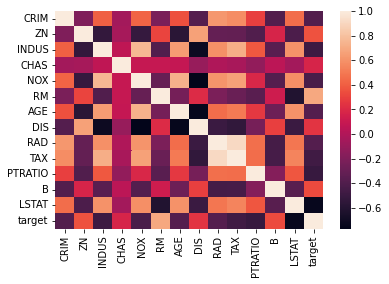

In [ ]:
import seaborn as sns
r = data.corr()
print(r)
# r < -0.9
# r > 0.9
sns.heatmap(r)

"""
From below correlation Matrix we have two variables which highly corelated. `RAD` and `TAX`
To avoid redundency we can remove one of them, So let's drop column `RAD` from dataset 
"""

In [ ]:
"""
Drop column `RAD` to avoid redundency for model prediction
"""
data.drop(['RAD'], axis=1, inplace=True)



**TODO 2**

Partition the data into 75% training and 25% validation set.

In [ ]:
"""
Data partition
  Training Data: 75%
  Validation Data: 25%
"""
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)


**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [ ]:
"""
Closed form solution for linear regression on traing data 
"""
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print("Feature weights are ", w)

# def predict(X):
#         return X.dot(self.w)

Feature weights are  [-0.08331443  0.05308159 -0.04122959  2.58626504 -2.97561077  5.49159142
 -0.00286607 -0.92140713 -0.00080416 -0.2806534   0.01215365 -0.43275056]



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [ ]:
"""
Consider only columns `AGE` and `RM` as predictors and `target` is output
  1. Split dataset into 75-25 for train-validation sets
  2. Fit Linear Regression on X_train, y_train
  3. Predict on X_val

Model 1: linreg_1
"""
X_train, X_val, y_train, y_val = train_test_split(data[['AGE', 'RM']], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)
from sklearn.linear_model import LinearRegression

linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

y_pred = linreg_1.predict(X_val)


**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
"""
Evaluate prediction performance of Model 1 by 
  1. Mean Absolute Error
  2. Root Mean Squared Error
"""
from sklearn import metrics
mae_1 = metrics.mean_absolute_error(y_val, y_pred)
print(f"Model 1, Mean Absolute Error : {mae_1}")

rmse_1 = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(f"Model 1, Root Mean Squared Error : {rmse_1}")


Model 1, Mean Absolute Error : 4.692246377079943
Model 1, Root Mean Squared Error : 6.236968213396187



**TODO 6**

Now consider all the features (after removing linearly dependent variables). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [ ]:

"""
Consider all columns (except RAD which is redundant) as predictors and `target` is output
  1. Split dataset into 75-25 for train-validation sets
  2. Fit Linear Regression on X_train, y_train
  3. Predict on X_val

Model 2: linreg_2
"""
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)
from sklearn.linear_model import LinearRegression

linreg_2 = LinearRegression()
linreg_2.fit(X_train, y_train)

y_pred = linreg_2.predict(X_val)



**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
"""
Evaluate prediction performance of Model 2 by 
  1. Mean Absolute Error
  2. Root Mean Squared Error
"""
from sklearn import metrics

mae_2 = metrics.mean_absolute_error(y_val, y_pred)
print(f"Model 2, Mean Absolute Error : {mae_2}")

rmse_2 = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(f"Model 2, Root Mean Squared Error : {rmse_2}")


Model 2, Mean Absolute Error : 3.6757495758030925
Model 2, Root Mean Squared Error : 4.824989720640999



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

[[4.692246377079943, 6.236968213396187], [3.6757495758030925, 4.824989720640999]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


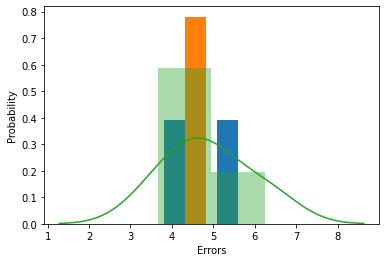

In [ ]:
"""
Comparing Model 1 and Model 2
Using histogram, to evaluate performance between two models.

It is clearly evident that Model 2 fits better compared to Model 1, with less error
In model 1 we just used 2 variables which could lead to underfit our model

"""

l = [[mae_1, rmse_1], [mae_2, rmse_2]]
print(l)
from matplotlib import pyplot as plt
plt.hist(l,bins=2,density=True)
plt.ylabel('Probability')
plt.xlabel('Errors')

import seaborn as sns
sns.distplot(l, bins=2)


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+03, tolerance: 3.008e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

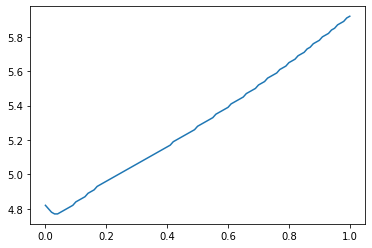

In [ ]:
"""
Consider all columns (except RAD which is redundant) as predictors and `target` is output: here we use Lasso linear regression

  1. Split dataset into 75-25 for train-validation sets
  2. To find best lambda value for lasso, we run model from 0 to 1 with step 0.01
  3. For each lambda
      1. Fit Linear Regression on X_train, y_train
      2. Predict on X_val
      3. Calculate RMSE of y_val to y_pred
  4. Capture all RMSE values for each lambda value
  5. Plot all RMSE values to choose best performing lambda

Model 3: lasso
"""
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

from sklearn.linear_model import Lasso
error_list = []

alphas = [i*0.01 for i in range(0, 101)]

for l in alphas:
    lasso = Lasso(alpha=l)
    lasso.fit(X_train, y_train)

    y_pred = lasso.predict(X_val)

    error = rmse(y_val, y_pred)

    error_list.append(round(error, 2))

import matplotlib.pyplot as plt
plt.plot(alphas, error_list)

In [ ]:
"""
From the above graph it is clear that 0.03

1. Fit Lasso model with lambda 0.03
2. Predict on X_val 
"""

best_alpha = alphas[error_list.index(min(error_list))]
print(f"Lambda with least RMSE : {best_alpha}")


model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)


Lambda with least RMSE : 0.03



**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
"""
Evaluate prediction performance of Model 3 by 
  1. Mean Absolute Error
  2. Root Mean Squared Error
"""


from sklearn import metrics

mae_3 = metrics.mean_absolute_error(y_val, y_pred)
print(f"Model 3, Mean Absolute Error : {mae_3}")


rmse_3 = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(f"Model 3, Root Mean Squared Error : {rmse_3}")

Model 3, Mean Absolute Error : 3.585646825881763
Model 3, Root Mean Squared Error : 4.772820793504805



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

[[4.692246377079943, 6.236968213396187], [3.6757495758030925, 4.824989720640999], [3.585646825881763, 4.772820793504805]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


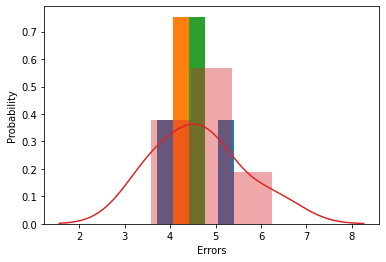

In [ ]:
"""
Comparing Model 1, Model 2 and Model 3
Using histogram, to evaluate performance between two models.

It is clearly evident that Model 3 fits better compared to Model 1 and Model 2, with less error
  1. In model 1 we just used 2 variables which could lead to underfit our model
  2. Lasso out perform Linear regression as it penalizes any high errors with NORM 1

"""

l = [[mae_1, rmse_1], [mae_2, rmse_2], [mae_3, rmse_3]]
print(l)
from matplotlib import pyplot as plt
plt.hist(l,bins=2,density=True)
plt.ylabel('Probability')
plt.xlabel('Errors')

import seaborn as sns
sns.distplot(l, bins=3)

## Part 2: K-Nearst-Neighbors

### Problem 2 ##

The wine dataset is the result of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and k-NN classifier.

In [ ]:
# load the wine dataset 
wine = datasets.load_wine()


In [ ]:
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]


In [ ]:
data = X
data['target'] = y

**TODO 1**

Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set, then standardize them.

In [ ]:
"""
Considering k-NN, it is recommended to scale the data before modelling, 
because in k-NN we caluclate propensisty of output class based on distance/similarity between instances
So we standardize data before model building

Here we are partitioning data as 75-25 for training and validation data set
"""

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)

In [ ]:
"""
Standardize data using StandardScaler() and transform both train and validation data sets
"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

**TODO 2**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [ ]:
"""
To find the best k from 1-10
1. For each k in 1-10
    1. fit knn on X_train, y_train
    2. Predict on X_val
    3. Capture accuracy comparing y_pred with y_val
2. Find the best k,with best accuracy
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy_list = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    acc = metrics.accuracy_score(y_val, y_pred)
    accuracy_list.append([k, acc])

print(accuracy_list)

best_k = max(accuracy_list, key = lambda x:x[1])[0]
print(f"Best k with maximum accuracy: {best_k}")

[[1, 0.9393939393939394], [2, 0.9090909090909091], [3, 0.9393939393939394], [4, 0.8787878787878788], [5, 1.0], [6, 1.0], [7, 1.0], [8, 0.9696969696969697], [9, 1.0], [10, 0.9696969696969697]]
Best k with maximum accuracy: 5


**TODO 3**

Classify the new record given below using the chosen k. 

Considering the size of the wine dataset, would you recommend data partition before scoring the new record? Why?

In [ ]:
# New record
new_wine = pd.DataFrame(columns = wine['feature_names'])
new_wine.loc[0,:] = np.array([14.12, 1.88, 2.31, 18.5, 125, 2.50, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955])


In [ ]:
"""
With k value = 5
1. Fit k-NN classifier and predict class of new wine

"""

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

new_wine = scaler.transform(new_wine)

y_pred = knn.predict(new_wine)
print(y_pred)
print(f"New wine belongs to class {y_pred}")

"""
We think no, because size of data set is very small, for 13 predictors we just have 130 row in total, by partition we just get 97 rows in training set,
which less compared to our thumpb rule of having atleast d*10=130 rows for better data sampling and model learning
"""

[0]
New wine belongs to class [0]


'\nWe think no, because size of data set is very small, for 13 predictors we just have 130 row in total, by partition we just get 97 rows in training set,\nwhich less compared to our thumpb rule of having atleast d*10=130 rows for better data sampling and model learning\n'

### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN classifier to predict the mpg with the given attributes.

In [ ]:
# import the dataset "auto_mpg.csv"
import pandas as pd
from google.colab import files
file = files.upload()

df = pd.read_csv('auto_mpg.csv')
df.head()

Saving auto_mpg.csv to auto_mpg (4).csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# df = df[df['horsepower']!='?']

"""
Found a missing value in column `horsepower`, so replacing it to None,so we can impute it before modelling
"""

df = df.replace({'?': None})

In [ ]:

X = df.iloc[:, 1:]
y = df['mpg']


**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [ ]:

"""
More than 75 % of values in column "Car Name" are unique. So it doesn't help for our prediction.
So, we decided to remove this variable
"""
print(f"Unique values in column `car name`: {X['car name'].nunique()}")

print(f"Car name has {round((X['car name'].nunique() / X.shape[0])*100, 2)}% of unique values in dataset")

X.drop(columns= ['car name'], inplace=True)



Unique values in column `car name`: 301
Car name has 76.59% of unique values in dataset


**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [ ]:
"""
Converting categorical variable origin into dummy variables
  1. It has 3 unique values 1, 2, 3
  2. So we get 3 new column with binary encoding to them

"""

print(f"Unique values in column `origin` are: {X['origin'].unique()}")

df_dc = pd.get_dummies(X, columns=['origin'])


Unique values in column `origin` are: [1 3 2]


**TODO 3**

Rescale the numeric data. Note that dummy variables should not be rescaled.

In [ ]:
"""
Preprocessing before modelling
    1. Remove unnecessary variable like `Car Name`
    2. Convert Categorical variables into dummy variables
        Used one-hot encoding to do this
    3. Impute missing values, strategy='median'
    4. Rescale numerical data using StandardScaler()

Ensured that dummy variables are not rescaled 

"""


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [col for col in X.columns if col not in ('origin')]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['origin']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

p_df = preprocessor.fit_transform(X)

X_df = pd.DataFrame(p_df, columns = df_dc.columns)
X_df.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,1.484867,1.078523,0.665637,0.621628,-1.287786,-1.625418,1.0,0.0,0.0
1,1.484867,1.490488,1.577165,0.844701,-1.469418,-1.625418,1.0,0.0,0.0
2,1.484867,1.183909,1.186510,0.541369,-1.651050,-1.625418,1.0,0.0,0.0
3,1.484867,1.049781,1.186510,0.537828,-1.287786,-1.625418,1.0,0.0,0.0
4,1.484867,1.030620,0.926074,0.556712,-1.832683,-1.625418,1.0,0.0,0.0


**TODO 4**

Partition the data into 75% training and 25% validation set.

In [ ]:
"""
Partition the data into 75-25 for training and validation dataset

"""

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_df, 
                                                  y, 
                                                  test_size = 0.25,
                                                  random_state = 1)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

[3.9894178203660924, 3.7419003436513623, 3.678478068150952, 3.5920199502831722, 3.5300453541024375, 3.6323145947695643, 3.5972523814626878, 3.7463433350186133, 3.74888186348109, 3.7203683156430096]


Text(0, 0.5, 'RMSE')

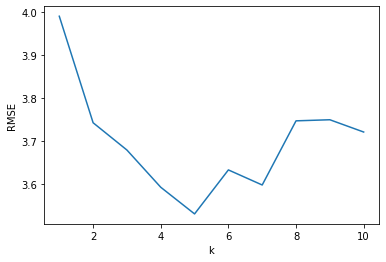

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

k_range = range(1,11)

error_list = []

for k in k_range:
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)

  error_list.append(rmse(y_val, y_pred))

print(error_list)


plt.plot( k_range, error_list)
plt.xlabel("k")
plt.ylabel("RMSE")

In [ ]:
"""
From above plot of k vs RMSE, it is clearly evident that model performs best with k = 5
"""
print("Best k for this model is 5")

Best k for this model is 5


**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [ ]:
from sklearn import metrics

best_k = 5

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print(f"RMSE of model is : {rmse(y_val, y_pred)}")
print(f"Mean Abosolute Error of model is : {metrics.mean_absolute_error(y_val, y_pred)}")



RMSE of model is : 3.5300453541024375
Mean Abosolute Error of model is : 2.431919191919192


In [ ]:
"""
Error rate very less, so k-NN model with k=5 has good performance on validation data set
"""

'\nError rate very less, so k-NN model with k=5 has good performance on validation data set\n'